<a href="https://colab.research.google.com/github/abdullahshak619/PortfolioProject/blob/main/Copy_of_IBM_HR_attrition_Abdullah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#Explotatory Data Analysis(EDA)

In [ ]:
df ['Attrition'].value_counts ()

No     1233
Yes     237
Name: Attrition, dtype: int64

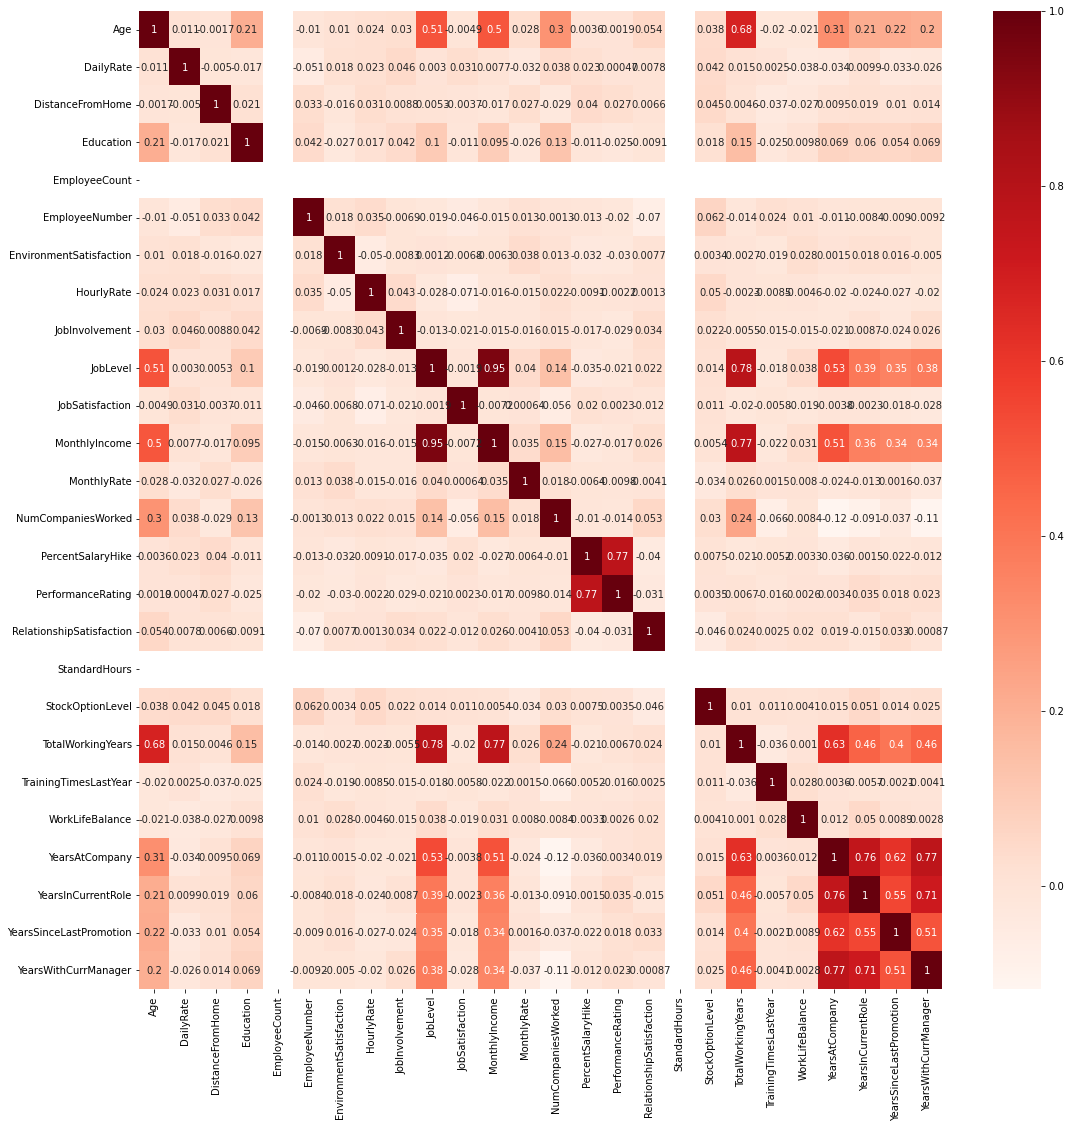

In [ ]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(), annot=True, cmap = 'Reds')
plt.show()

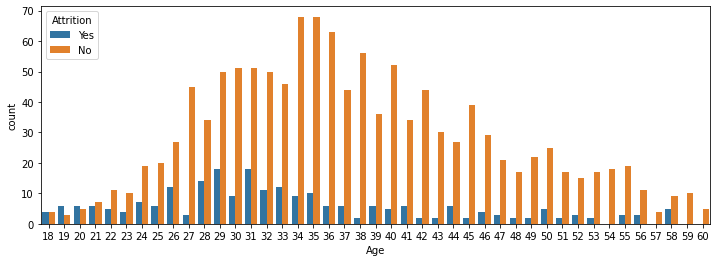

In [ ]:
plt.subplots(figsize=(12,4))
sns.countplot(x='Age',hue='Attrition',data=df)

**Most of the employees in the age group of 25-34 have attrited**

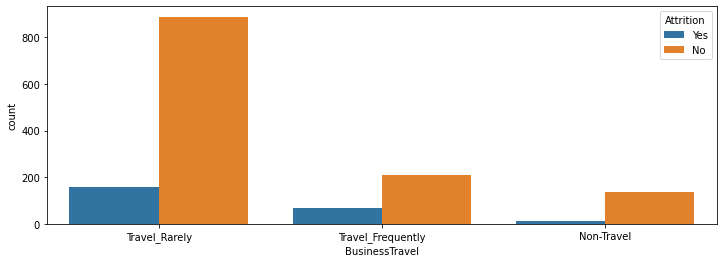

In [ ]:
plt.subplots(figsize=(12,4))
sns.countplot(x='BusinessTravel',hue='Attrition',data=df)

**Employees who travel frequently are less but has a high chance for attrition**

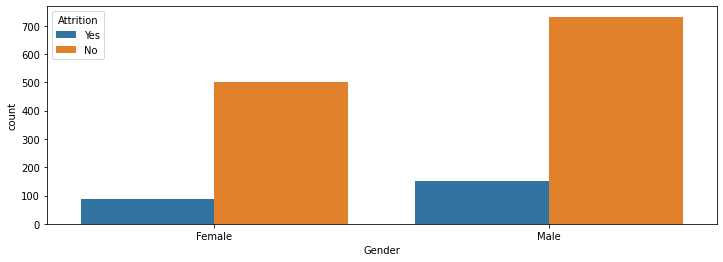

In [ ]:
plt.subplots(figsize=(12,4))
sns.countplot(x='Gender',hue='Attrition',data=df)

**Gender doesnt have a affect on atttition**

In [ ]:
(pd.crosstab(df['Attrition'],df['OverTime'],normalize=True,margins=True, margins_name="Total%")*100).round(1)


OverTime,No,Yes,Total%
Attrition,,,
No,64.2,19.7,83.9
Yes,7.5,8.6,16.1
Total%,71.7,28.3,100.0


In [ ]:
pd.crosstab(df['Attrition'],df['OverTime'],margins=True, margins_name="Total")


OverTime,No,Yes,Total
Attrition,,,
No,944,289,1233
Yes,110,127,237
Total,1054,416,1470


**Out of 416 Overtime employees, 127(30% of 416) have attrited ... Thats quite high**

In [ ]:
(pd.crosstab(df['Attrition'],df['JobLevel'],normalize=True,margins=True, margins_name="Total")*100).round(1)

JobLevel,1,2,3,4,5,Total
Attrition,,,,,,
No,27.2,32.8,12.7,6.9,4.4,83.9
Yes,9.7,3.5,2.2,0.3,0.3,16.1
Total,36.9,36.3,14.8,7.2,4.7,100.0


In [ ]:
pd.crosstab(df['Attrition'],df['JobLevel'],margins=True, margins_name="Total")

JobLevel,1,2,3,4,5,Total
Attrition,,,,,,
No,400,482,186,101,64,1233
Yes,143,52,32,5,5,237
Total,543,534,218,106,69,1470


**82% of Attrited people were from job level 1 and 2**

In [ ]:
(pd.crosstab(df['Attrition'],df['MaritalStatus'],normalize=True,margins=True, margins_name="Total%")*100).round(1)

MaritalStatus,Divorced,Married,Single,Total%
Attrition,,,,
No,20.0,40.1,23.8,83.9
Yes,2.2,5.7,8.2,16.1
Total%,22.2,45.8,32.0,100.0


In [ ]:
pd.crosstab(df['Attrition'],df['MaritalStatus'],margins=True, margins_name="Total")

MaritalStatus,Divorced,Married,Single,Total
Attrition,,,,
No,294,589,350,1233
Yes,33,84,120,237
Total,327,673,470,1470


**Almost 25% of Attirited are single as they are willing to take risk**




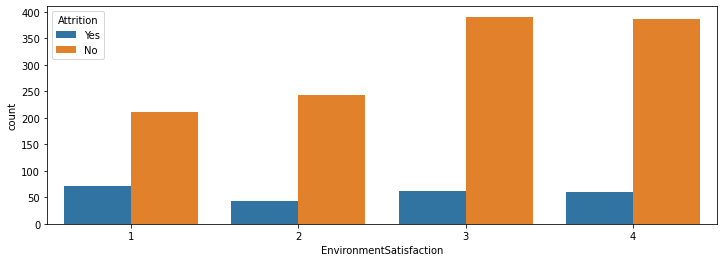

In [ ]:
plt.subplots(figsize=(12,4))
sns.countplot(x='EnvironmentSatisfaction',hue='Attrition',data=df)

**Employee who rated 1 star are likely to be attrite**

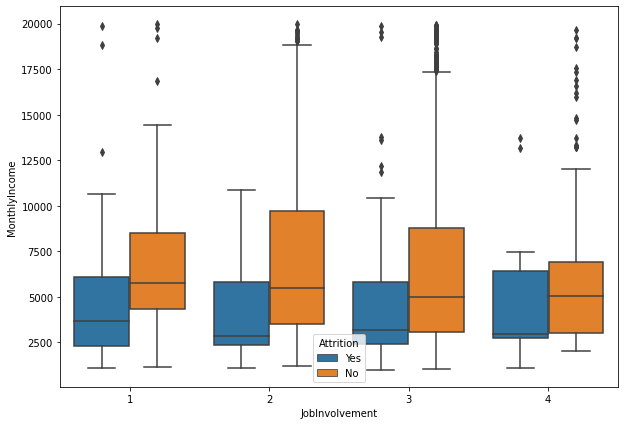

In [ ]:
#Jobinvolvement and  Monthly income vs Attrition
plt.figure(figsize=(10,7))
sns.boxplot(x="JobInvolvement", y="MonthlyIncome", hue="Attrition",
            data=df)

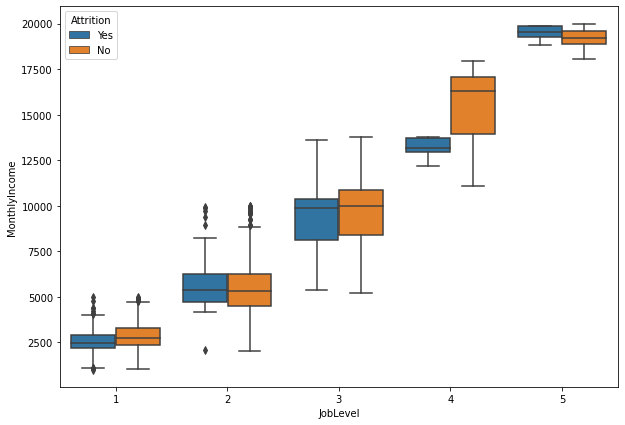

In [ ]:
#Jobinvolvement and  Monthly income vs Attrition
plt.figure(figsize=(10,7))
sns.boxplot(x="JobLevel", y="MonthlyIncome", hue="Attrition",data=df)


**Low income together with similar job involvement is the reason behind attrition**

#Data Processing

In [ ]:
df['Gender'] = df['Gender'].replace({'Female': 0, 'Male': 1})
df['OverTime'] = df['OverTime'].replace({'No': 0, 'Yes': 1})
df['Attrition'] = df['Attrition'].replace({'No': 0, 'Yes': 1})
df['BusinessTravel'] = df['BusinessTravel'].replace({'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2})

In [ ]:
from sklearn.preprocessing import LabelEncoder
for column in df.columns:
    if df[column].dtype==np.number:
        continue
    else:
        df[column]=LabelEncoder().fit_transform(df[column])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,1,624,2,0,1,1,0,0,1,0,64,2,1,7,3,2,809,999,8,0,1,0,0,0,0,0,8,0,0,6,4,0,5
1,31,0,2,113,1,7,0,1,0,1,2,1,31,1,1,6,1,1,682,1328,1,0,0,12,1,3,0,1,10,3,2,10,7,1,7
2,19,1,1,805,1,1,1,4,0,2,3,1,62,1,0,2,2,2,62,18,6,0,1,4,0,1,0,0,7,3,2,0,0,0,0
3,15,0,2,820,1,2,3,1,0,3,3,0,26,2,0,6,2,1,313,1228,1,0,1,0,0,2,0,0,8,3,2,8,7,3,0
4,9,0,1,312,1,1,0,3,0,4,0,1,10,2,0,2,1,1,399,846,9,0,0,1,0,3,0,1,6,3,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,18,0,2,494,1,22,1,3,0,1465,2,1,11,3,1,2,3,1,210,599,4,0,0,6,0,2,0,1,17,3,2,5,2,0,3
1466,21,0,1,327,1,5,0,3,0,1466,3,1,12,1,2,0,0,1,1070,1123,4,0,0,4,0,0,0,1,9,5,2,7,7,1,7
1467,9,0,1,39,1,3,2,1,0,1467,1,1,57,3,1,4,1,1,821,175,1,0,1,9,1,1,0,1,6,0,2,6,2,0,3
1468,31,0,2,579,2,1,2,3,0,1468,3,1,33,1,1,7,1,1,730,641,2,0,0,3,0,3,0,0,17,3,1,9,6,0,8


#Predictions

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Split df into X and y
   
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,  random_state=42)

In [ ]:
models = {
    "                   Logistic Regression": LogisticRegression(),
    "                   K-Nearest Neighbors": KNeighborsClassifier(),
    "                         Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "   Support Vector Machine (RBF Kernel)": SVC(),
    "                        Neural Network": MLPClassifier(),
    "                         Random Forest": RandomForestClassifier(),
    "                     Gradient Boosting": GradientBoostingClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")
    y_pred = model.predict(X_test)
    
    
    print('\033[1m', name, '\033[0m')
    print('accuracy score is: \033[1m', accuracy_score(y_test, y_pred),'\033[0m')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


                   Logistic Regression trained.
                    Logistic Regression 
accuracy score is:  0.8480725623582767 
                   K-Nearest Neighbors trained.
                    K-Nearest Neighbors 
accuracy score is:  0.8344671201814059 
                         Decision Tree trained.
                          Decision Tree 
accuracy score is:  0.7936507936507936 
Support Vector Machine (Linear Kernel) trained.
 Support Vector Machine (Linear Kernel) 
accuracy score is:  0.8616780045351474 
   Support Vector Machine (RBF Kernel) trained.
    Support Vector Machine (RBF Kernel) 
accuracy score is:  0.8616780045351474 
                        Neural Network trained.
                         Neural Network 
accuracy score is:  0.8412698412698413 
                         Random Forest trained.
                          Random Forest 
accuracy score is:  0.8684807256235828 
                     Gradient Boosting trained.
                      Gradient Boosting 
accuracy

**Accuracy is around 84-87%**

In [ ]:
for name, model in models.items():
    print(name + ": {:.2f}%".format(model.score(X_test, y_test) * 100))

                   Logistic Regression: 84.81%
                   K-Nearest Neighbors: 83.45%
                         Decision Tree: 79.37%
Support Vector Machine (Linear Kernel): 86.17%
   Support Vector Machine (RBF Kernel): 86.17%
                        Neural Network: 84.13%
                         Random Forest: 86.85%
                     Gradient Boosting: 87.76%
